In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()
from sklearn.decomposition import PCA

import imp

from ikd import utils, core, evaluate, datasets
imp.reload(utils)
imp.reload(core)
imp.reload(evaluate)
imp.reload(datasets)

# from ipywidgets import interact
# import ipywidgets as widgets

<module 'ikd.datasets' from '/storage/scratch1/1/cli726/ikd/ikd/ikd/datasets.py'>

Clique threshold: 0.1, number of cliques: 236


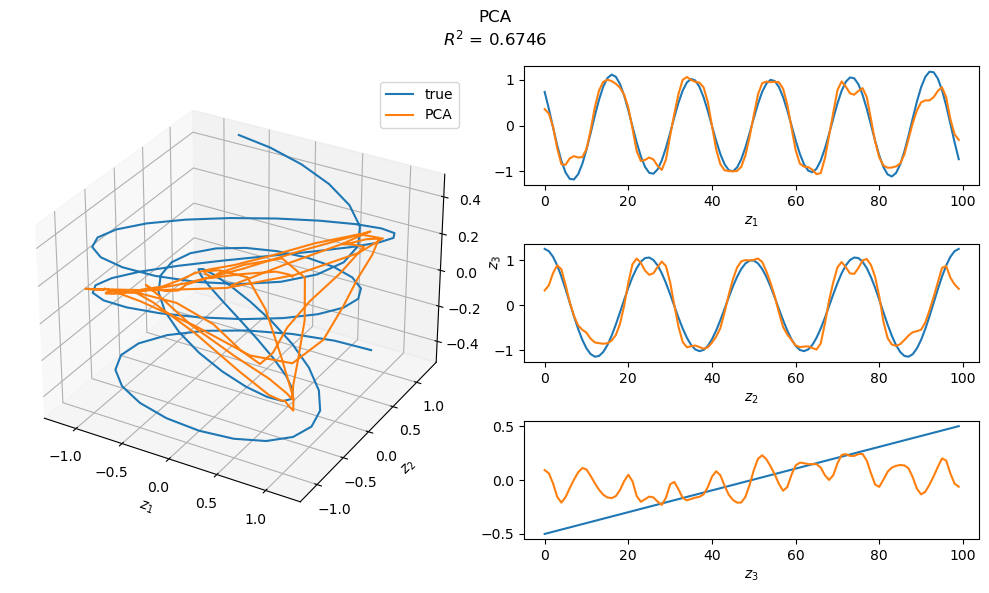

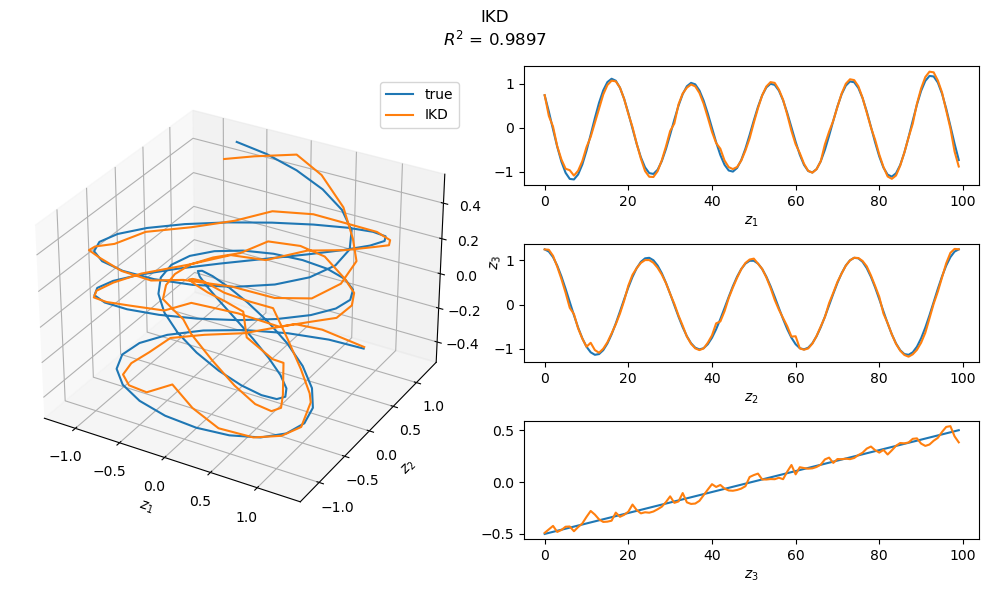

In [40]:
d_latent = 3 # latent dimensionality
dataset = 1
n_points = 100 # number of observations T
d_observation = 1000 # observation dimensionality
kernel = ["squared exponential", "rational quadratic", "gamma-exponential", "matern"][0]
extra_kernel_hyperparam = [None, 1, 1, 3/2][0]
variance = 1
length_scale = 0.5

z_true = datasets.generate_latent(d_latent, dataset, n_points=n_points, show=False)
cov_true = utils.kernel_cov_generator(z_true, kernel=kernel, variance=variance, length_scale=length_scale, extra_kernel_hyperparam=extra_kernel_hyperparam) # K, true kernel covariance matrix

seed = 3
x = datasets.gaussian_process_generator(cov_true, d_observation, seed)

z_pca = PCA(n_components=d_latent).fit_transform(x)
z_ikd = core.ikd_blockwise(x, d_latent, kernel=kernel, extra_kernel_hyperparam=extra_kernel_hyperparam)

evaluate.compare_latents(z_true, utils.align(z_true, z_pca), 'PCA')
evaluate.compare_latents(z_true, utils.align(z_true, z_ikd), 'IKD')